# GBR Evaluation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file = r'/content/drive/MyDrive/Colab/gbr-mcr/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 6] # mt column
Y = dataset[:, 5] # mcr column

In [3]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)

# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# size
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (115196, 1)
Val:  (28800, 1)
Test:  (36000, 1)


In [4]:
from sklearn.ensemble import GradientBoostingRegressor

# model
gbr = GradientBoostingRegressor(subsample=0.8,
                                learning_rate=0.4,
                                n_estimators=12,
                                max_depth=8,
                                min_samples_split=200, 
                                min_samples_leaf=40,
                                loss="absolute_error")

gbr.fit(X_train, Y_train)
gbr.score(X_val, Y_val)

0.6212420125058346

In [5]:
Y_predict = gbr.predict(X_val)

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
mape = mean_absolute_percentage_error(Y_val, Y_predict)
mae = mean_absolute_error(Y_val, Y_predict)
mse = mean_squared_error(Y_val, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)
print("MSE : ", mse)

MAPE :  5.208549075504726
MAE :  9.722848280065913
MSE :  9149.306352328345


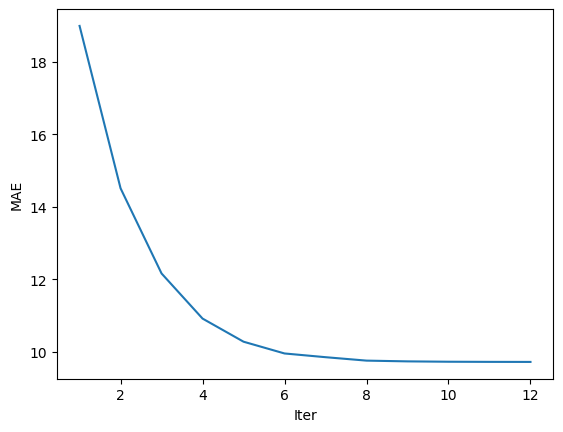

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

mae = []
for Y_predict in gbr.staged_predict(X_val):
    mae.append(mean_absolute_error(Y_val, Y_predict))

plt.plot(np.arange(1, gbr.n_estimators + 1), mae)
plt.xlabel("Iter")
plt.ylabel("MAE")
plt.show()